# Demo new sg locations for IEEE technote

Repeating the IFAC tests with new operators for a technical note to submit to IEEE Automation Science and Engineering.

Demonstrated positions are created by `manual_with_triggering.py`, and stored in a `.csv` file. Subgoal labels should be obvious after a 3D plot. Might average a few cycles but (of course) the sourcing of subgoal locations is still a major challenge.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import exc_analysis.kinematics as kin
import exc_analysis.plotting as excplt

In [2]:
mpl.style.use('mitch-exp')

In [3]:
reload(kin)

<module 'exc_analysis.kinematics' from '/Users/mitchallain/Development/Python/exc_analysis/exc_analysis/kinematics.pyc'>

In [4]:
ls

sg-locations.ipynb   sgs_1253_040417.csv


Import data with pandas

In [5]:
data = pd.read_csv('sgs_1253_040417.csv')
data.head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
0,11.728505,7.4745,6.9645,7.614,7.4695,10.228333,8.566250,3.776923,0.000000
1,40.391269,7.4745,6.9645,7.614,7.4695,9.656429,3.620741,3.776923,1.305724
2,43.378812,7.4745,6.9645,7.614,7.4695,7.492194,3.648148,3.823846,1.305724
3,51.473174,7.4745,6.9645,7.614,7.4695,7.492194,6.566800,10.027500,1.356775
4,57.942264,7.4745,6.9645,7.614,7.4695,9.825000,6.534400,10.347889,1.356775


In [19]:
states = data.as_matrix(columns=['Boom Ms', 'Stick Ms', 'Bucket Ms', 'Swing Ms'])
states_xyz = kin.forward_kin_array(states)
states_xyz

array([[ 57.31152452,   0.        ,  23.29490958],
       [ 19.01044637,  70.03044752,  34.68479668],
       [ 19.49399941,  71.81175421,  11.75020909],
       [ 10.48191843,  48.22604424,  13.63390628],
       [  9.98497332,  45.93965965,  31.71087102],
       [ 46.91178221,  -1.5203646 ,  31.6762614 ],
       [ 63.37620849,  -2.05396043,  25.01220783],
       [ 18.45271718,  60.83045628,  24.69371363],
       [ 20.50920864,  70.59315916,   9.1437722 ],
       [ 12.97236161,  44.65116152,   9.18958892],
       [ 12.54908968,  43.19425   ,  28.4984561 ],
       [ 44.79354442,  -2.33283153,  28.68195786],
       [ 61.44998015,  -3.20029265,  20.6780293 ]])

In [7]:
states_xyz.shape

(13, 3)

<IPython.core.display.Javascript object>


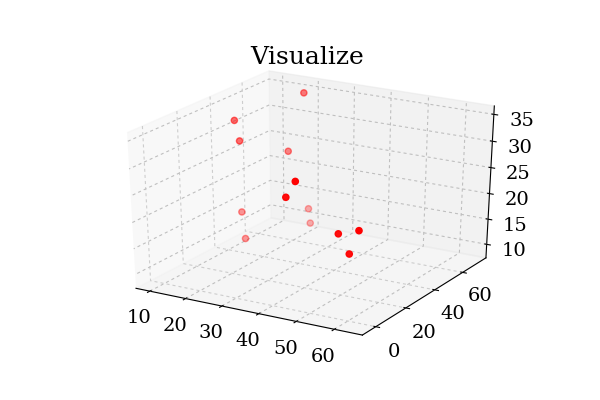

In [8]:
excplt.plot_3d_scatter(states_xyz, 'Visualize')

In [13]:
labels = np.array([5] + range(6)*2)
labels

array([5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5])

<IPython.core.display.Javascript object>


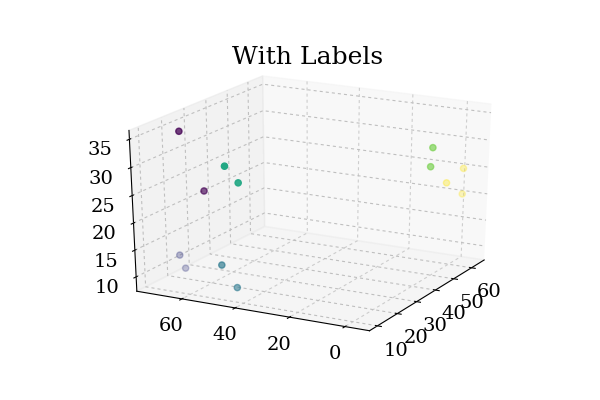

In [14]:
excplt.plot_3d_scatter(states_xyz, 'With Labels', color=labels)

In [20]:
# Discard the outlier
states_xyz_new = np.delete(states_xyz, [1], axis=0)
labels_new = np.delete(labels, [1], axis=0)
states_new = np.delete(states, [1], axis=0)
states_xyz_new, labels_new, states

(array([[ 57.31152452,   0.        ,  23.29490958],
        [ 19.49399941,  71.81175421,  11.75020909],
        [ 10.48191843,  48.22604424,  13.63390628],
        [  9.98497332,  45.93965965,  31.71087102],
        [ 46.91178221,  -1.5203646 ,  31.6762614 ],
        [ 63.37620849,  -2.05396043,  25.01220783],
        [ 18.45271718,  60.83045628,  24.69371363],
        [ 20.50920864,  70.59315916,   9.1437722 ],
        [ 12.97236161,  44.65116152,   9.18958892],
        [ 12.54908968,  43.19425   ,  28.4984561 ],
        [ 44.79354442,  -2.33283153,  28.68195786],
        [ 61.44998015,  -3.20029265,  20.6780293 ]]),
 array([5, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]),
 array([[ 10.22833333,   8.56625   ,   3.77692308,   0.        ],
        [  9.65642857,   3.62074074,   3.77692308,   1.30572445],
        [  7.49219355,   3.64814815,   3.82384615,   1.30572445],
        [  7.49219355,   6.5668    ,  10.0275    ,   1.35677533],
        [  9.825     ,   6.5344    ,  10.34788889,   1.35677533]

<IPython.core.display.Javascript object>


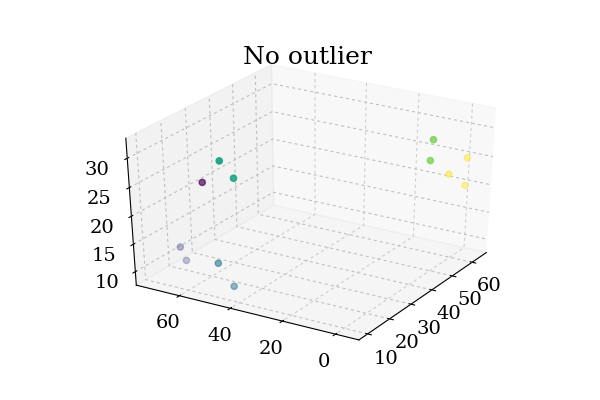

In [18]:
excplt.plot_3d_scatter(states_xyz_new, 'No outlier', color=labels_new)

In [24]:
np.mean(states[labels==1], axis=0)

array([ 7.36845161,  3.56592593,  4.13942308,  1.29688872])

In [25]:
# Compute the means for each subgoal
for i in np.unique(labels):
    mean = np.mean(states[labels==i], axis=0)
    print('SG %i: %s' % (i, mean))

SG 0: [ 9.74071429  5.07757037  4.10446154  1.29099823]
SG 1: [ 7.36845161  3.56592593  4.13942308  1.29688872]
SG 2: [ 7.36845161  7.0824      9.76439286  1.32241416]
SG 3: [  9.74071429   7.0662      10.27448016   1.32241416]
SG 4: [  9.74071429   7.0984      10.28894444  -0.04221515]
SG 5: [ 9.91730159  7.57701667  3.97282542 -0.02814343]


Moving over to `tests/sg_models/sgs_0403.py`
___